In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium

In [2]:
shapes_df = gpd.read_file('colonias_ine_2017.shp', driver='ESRI Shapefile')
leon_col=shapes_df[shapes_df["municipio"]==20]
leon_col.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1117 entries, 130 to 5719
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   gid         1117 non-null   int64   
 1   id          1117 non-null   float64 
 2   entidad     1117 non-null   int64   
 3   municipio   1117 non-null   int64   
 4   nombre      1117 non-null   object  
 5   clasificac  1117 non-null   int64   
 6   cp          1117 non-null   float64 
 7   otros_cp    46 non-null     object  
 8   control     1117 non-null   float64 
 9   geometry1_  1117 non-null   object  
 10  geometry    1117 non-null   geometry
dtypes: float64(3), geometry(1), int64(4), object(3)
memory usage: 104.7+ KB


<AxesSubplot:>

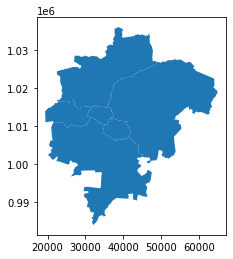

In [3]:
leon_distloc = gpd.read_file('distloc_leon.shp', driver='ESRI Shapefile')
dist3 = pd.read_csv('distrito3_na.csv')
leon_distloc.plot()

In [4]:
leon_col = pd.merge(leon_col, dist3, how="left", on=["nombre"])
leon_col.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1117 entries, 0 to 1116
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gid                   1117 non-null   int64   
 1   id                    1117 non-null   float64 
 2   entidad               1117 non-null   int64   
 3   municipio             1117 non-null   int64   
 4   nombre                1117 non-null   object  
 5   clasificac            1117 non-null   int64   
 6   cp                    1117 non-null   float64 
 7   otros_cp              46 non-null     object  
 8   control               1117 non-null   float64 
 9   geometry1_            1117 non-null   object  
 10  geometry              1117 non-null   geometry
 11  Zona                  114 non-null    object  
 12  Sector                114 non-null    float64 
 13  Colonias              114 non-null    object  
 14  Liderazgos            114 non-null    object  
 

In [6]:
m = folium.Map(location=[21.12862317608329, -101.66700367019011], zoom_start=12) 
dist=folium.Choropleth(
    geo_data=leon_distloc,
    name='Distritos Leon',
    legend_name='Distritos Leon',
    #data=state_data,
    #columns=['State', 'Unemployment'],
    #key_on='feature.nombre',
    fill_color='lightgray',
    fill_opacity=0.7,
    line_weight=2,
    line_color='red',
).add_to(m)

dist.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['distrito_l'],
        aliases=['Distrito'],
        localize=True
    ))

col=folium.Choropleth(
    geo_data=leon_col,
    data=dist3,
    columns=['nombre','tendencia_number'],
    key_on='feature.properties.nombre',
    fill_color='RdBu',
    fill_opacity=0.7,
    line_opacity=0.5,
    nan_fill_color = "white",
    name='Colonias Leon',
    legend_name='Colonias Leon'
).add_to(m)

col.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['Sector','nombre','Tendencia'],
        aliases=['Sector','Colonia:','Partido:'],
        #style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;"),
        localize=True
    ))

folium.LayerControl().add_to(m)
m